In [1]:
import os
from pynq import PL
from pynq import Overlay
from pynq.lib.video import *
from pynq import Xlnk
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
ol = Overlay("base/hw_sobel.bit")

In [3]:
vdma_in = ol.axi_vdma_0
vdma_out = ol.axi_vdma_1

In [4]:
sobel_acc = ol.sobel_accel_0

Image size: 1920x1080 pixels.


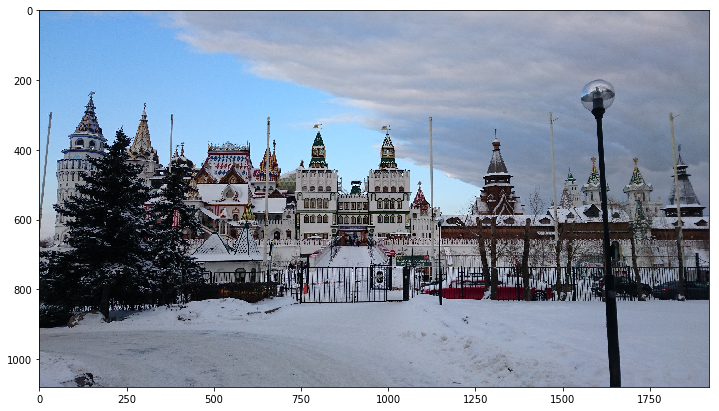

In [12]:
src_bgr = cv2.imread("data/FHD_1.jpg")
src_rgb = cv2.cvtColor(src_bgr, cv2.COLOR_BGR2RGB)
height = 1080
width = 1920
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)
print("Image size: {}x{} pixels.".format(width, height))
_ = plt.imshow(src_rgb)

In [6]:
framemode = VideoMode(1920,1080,24)

In [7]:
vdma_in.writechannel.mode = framemode
vdma_out.readchannel.mode = framemode

In [8]:
xlnk = Xlnk()

In [9]:
#read from DRAM and pass to sobel_accel
vdma_in.writechannel.start()
#read from sobel_accel and pass to DRAM
vdma_out.readchannel.start()

In [10]:
# auto restart mode
sobel_acc.write(0x00,0x81)

In [13]:
in_buffer = xlnk.cma_array(shape=(height, width, 3), dtype=np.uint8, cacheable=1)
out_buffer = xlnk.cma_array(shape=(height, width, 3), dtype=np.uint8, cacheable=1)
in_buffer[:] = src_rgb

In [ ]:
vdma_in.writechannel.setframe(in_buffer)
out_buffer = vdma_out.readchannel.readframe()

Image size: 1920x1080 pixels.


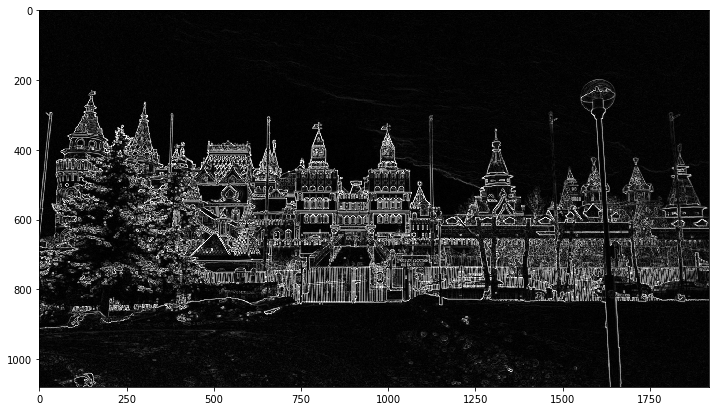

In [17]:
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)
print("Image size: {}x{} pixels.".format(width, height))
_ = plt.imshow(out_buffer)

In [28]:
cv2.imwrite("hw_sobel.jpg",out_buffer)

True

In [ ]:
# Reset to Flush Datas
vdma_in.writechannel.reset()
vdma_out.readchannel.reset()
ol.reset()